## Evaluation Task 2 for **Machine Learning Model for the Albedo of Mercury**

### Problem Statement 2 :

### Predicting Mercury’s elemental composition from Albedo with MESSENGER Data


### Importing important libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import urllib.request
import pandas as pd
from numpy import genfromtxt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Importing Dataset

Getting the data from https://github.com/ML4SCI/ML4SCI_GSoC/tree/main/Messenger/Mercury and converting it into proper format for further processing.

In [2]:
data_all = {}


top = urllib.request.urlopen('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/mercury-albedo-top-half.png.csv')
lines = [i.decode('utf-8') for i in top.readlines()]
data_all['top_half'] = genfromtxt(lines, delimiter=',')

bottom = urllib.request.urlopen('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/mercury-albedo-resized-bottom-half.png.csv')
lines = [i.decode('utf-8') for i in bottom.readlines()]
data_all['bottom_half'] = genfromtxt(lines, delimiter=',')

alsi = urllib.request.urlopen('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/alsimap_smooth_032015.png.csv')
lines = [i.decode('utf-8') for i in alsi.readlines()]
data_all['alsi'] = genfromtxt(lines, delimiter=',')

casi = urllib.request.urlopen('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/casimap_smooth_032015.png.csv')
lines = [i.decode('utf-8') for i in casi.readlines()]
data_all['casi'] = genfromtxt(lines, delimiter=',')

fesi = urllib.request.urlopen('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/fesimap_smooth_032015.png.csv')
lines = [i.decode('utf-8') for i in fesi.readlines()]
data_all['fesi'] = genfromtxt(lines, delimiter=',')

mgsi = urllib.request.urlopen('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/mgsimap_smooth_032015.png.csv')
lines = [i.decode('utf-8') for i in mgsi.readlines()]
data_all['mgsi'] = genfromtxt(lines, delimiter=',')

ssi = urllib.request.urlopen('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/ssimap_smooth_032015.png.csv')
lines = [i.decode('utf-8') for i in ssi.readlines()]
data_all['ssi'] = genfromtxt(lines, delimiter=',')

data_all["albedo"] = np.concatenate((data_all["top_half"], data_all["bottom_half"]))

### Data Visualization

The top-half , bottom-half of Mercury Albedo and chemical composition maps are visualized and present in two forms for better understanding of the data. Furthermore, data correlation matrix is visualized. On the basis of the correlation matrix, it can be said that the correlation between the albedo and elements is low as comapred to the moon.

<Figure size 432x288 with 0 Axes>

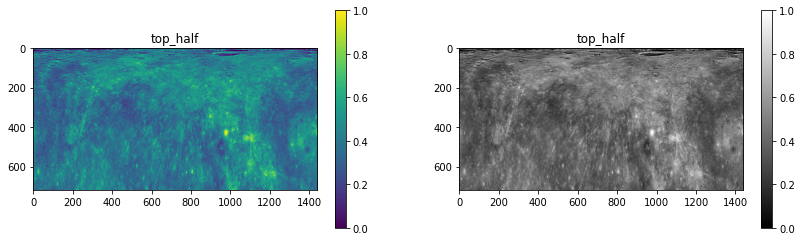

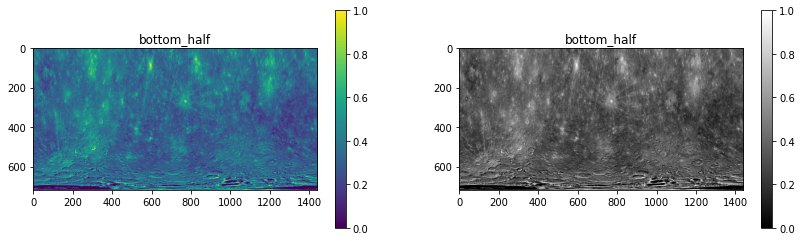

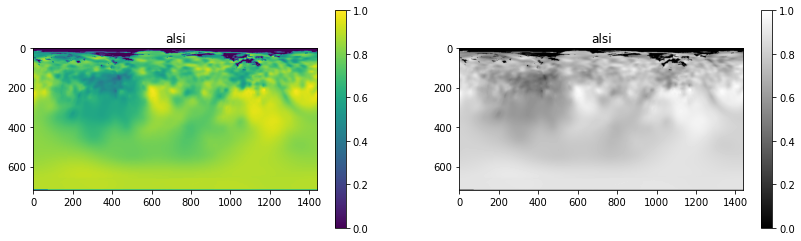

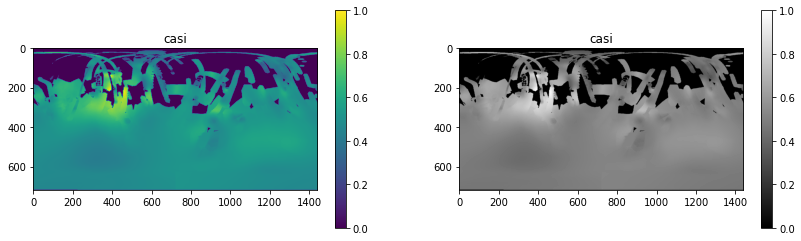

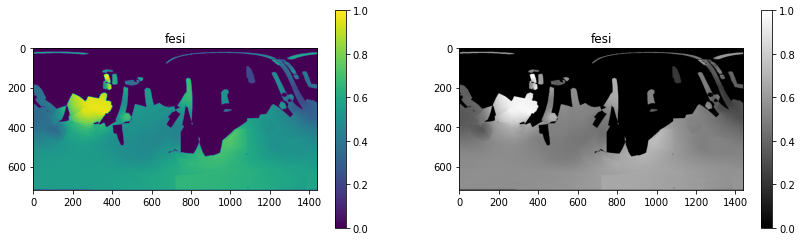

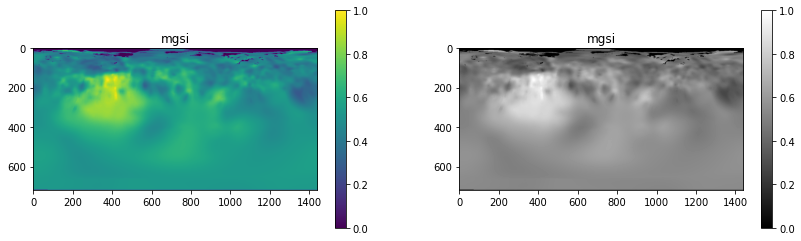

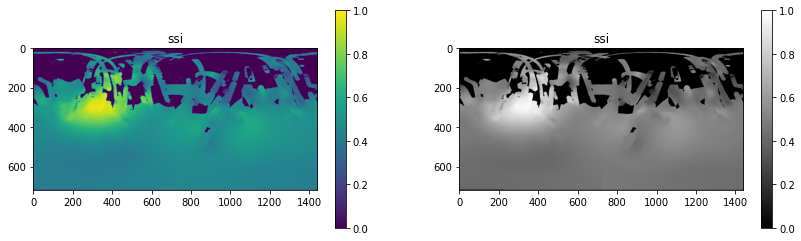

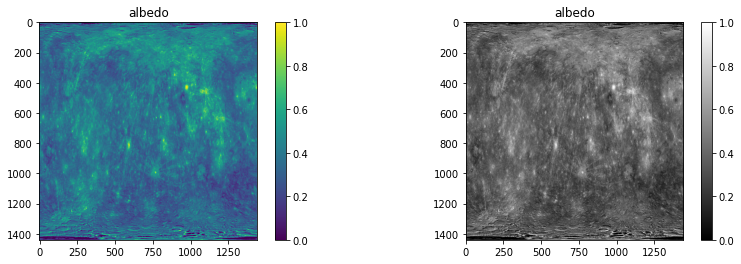

In [3]:
for i, (key, value) in enumerate(data_all.items()):
    plt.figure(i)
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    axes[0].set_title(f"{key}")
    original = axes[0].imshow(value)
    plt.colorbar(original, ax=axes[0])
    axes[1].set_title(f"{key}")
    gray_image = axes[1].imshow(value, cmap='gray')
    plt.colorbar(gray_image, ax=axes[1])    

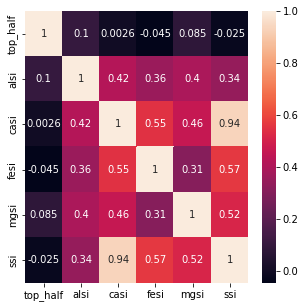

In [4]:
elem = np.array(list(zip(data_all['top_half'].flatten(), data_all['alsi'].flatten(), data_all['casi'].flatten(), data_all['fesi'].flatten(), data_all['mgsi'].flatten(),data_all['ssi'].flatten())))
df = pd.DataFrame(elem,columns=['top_half','alsi','casi','fesi','mgsi','ssi'])
corr = df.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True)

### Spliting Dataset into Test and Train sets



In [5]:
n = len(elem)//2
train = elem[:n]
test = elem[n:]
x_train, y_train = train[:,:1], train[:,1:]
x_test, y_test  = test[:,:1],  test[:,1:]

### Training ML model and calculation of the MSE and accuracy.

I decided to use the Linear Regression for this task. MSE(mean squared error) is used as a performance metric for this model. The mean squared error is found out to be 0.05845956007038442. 

In [9]:
model = LinearRegression().fit(x_train, y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
print("MSE for LinearRegression: ",mse)


MSE for LinearRegression:  0.05845956007038442


### Results:

Prediction about chemical composition for the top half of the planet using the albedo is shown below

<Figure size 432x288 with 0 Axes>

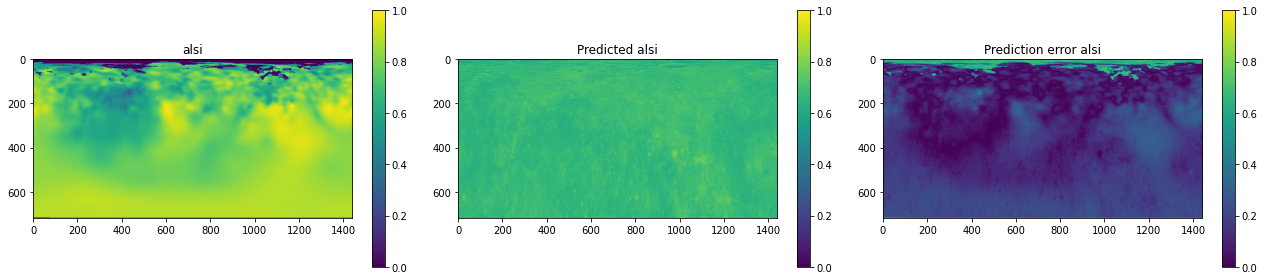

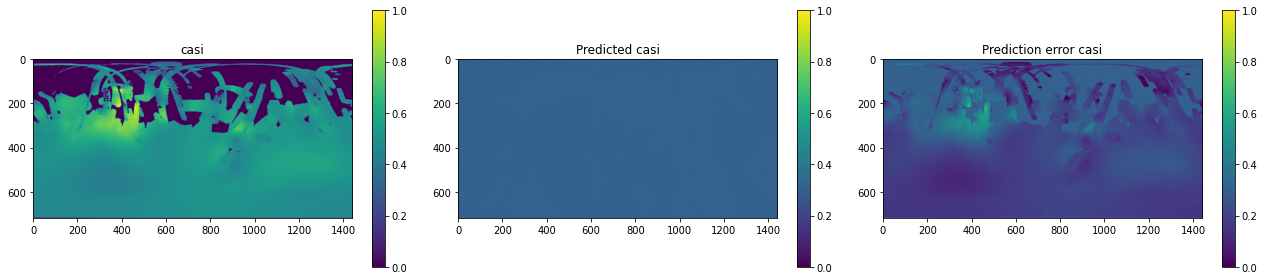

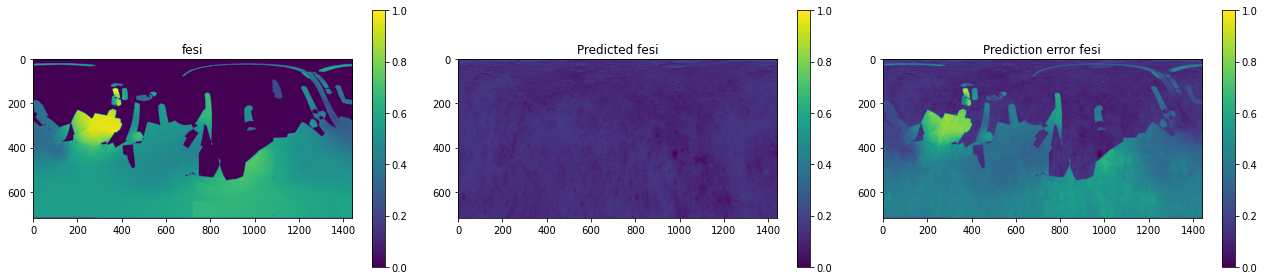

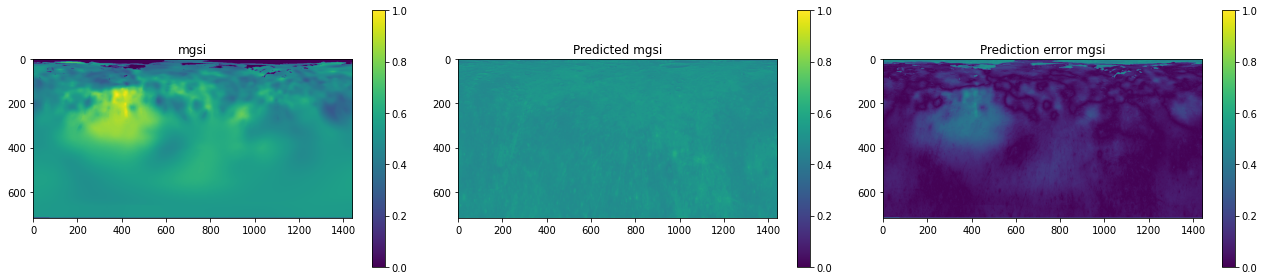

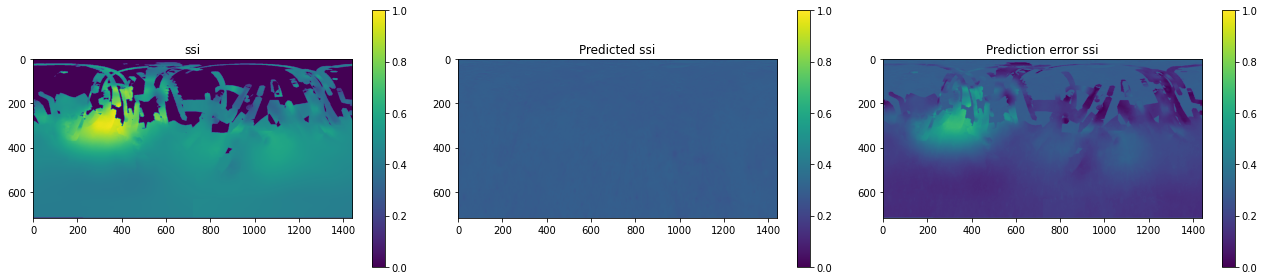

In [7]:
prediction = model.predict(data_all['top_half'].reshape(-1,1))
elem = ["alsi","casi", "fesi","mgsi", "ssi"]

for i, name in enumerate(elem):
    img = data_all[name]
    predicted_img = prediction[:,i].reshape(720,-1)
    prediction_error = np.abs(predicted_img - img)
    plt.figure(i)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
    axes[0].set_title(f"{name}")
    im = axes[0].imshow(img, vmin=0, vmax=1)
    plt.colorbar(im, ax=axes[0])
    axes[1].set_title(f"Predicted {name}")
    im = axes[1].imshow(predicted_img, vmin=0, vmax=1)
    plt.colorbar(im, ax=axes[1])
    axes[2].set_title(f"Prediction error {name}")
    im = axes[2].imshow(prediction_error, vmin=0, vmax=1)
    plt.colorbar(im, ax=axes[2])
    fig.tight_layout()

Prediction about chemical composition for the bottom half of the planet using the albedo is shown below

<Figure size 432x288 with 0 Axes>

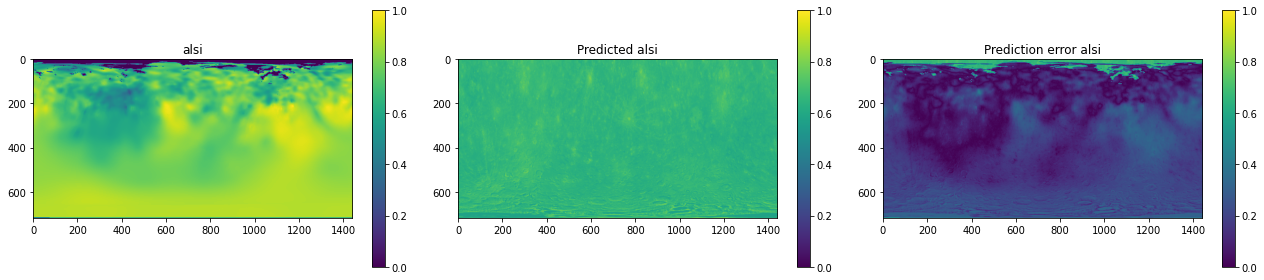

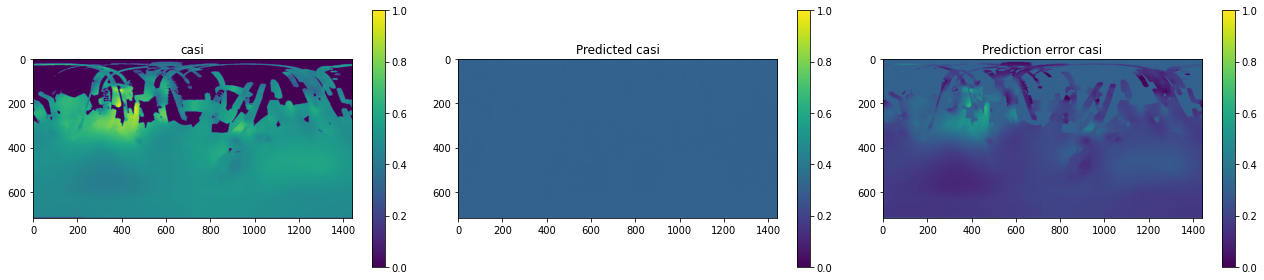

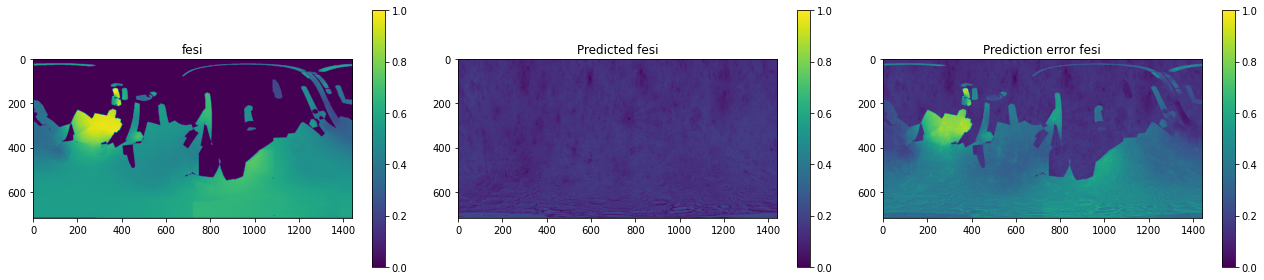

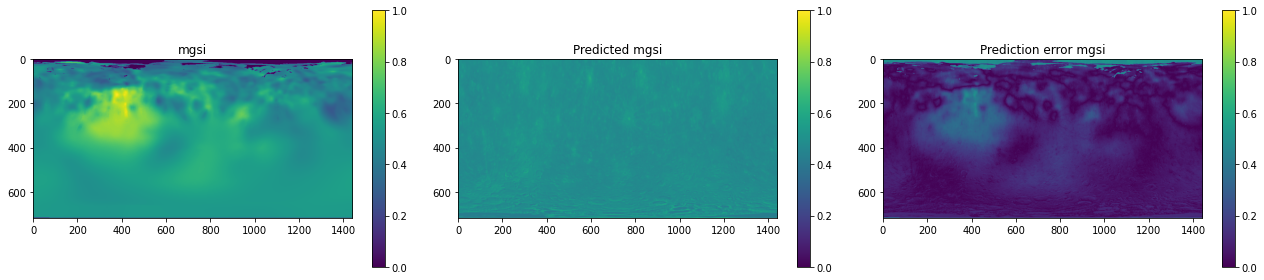

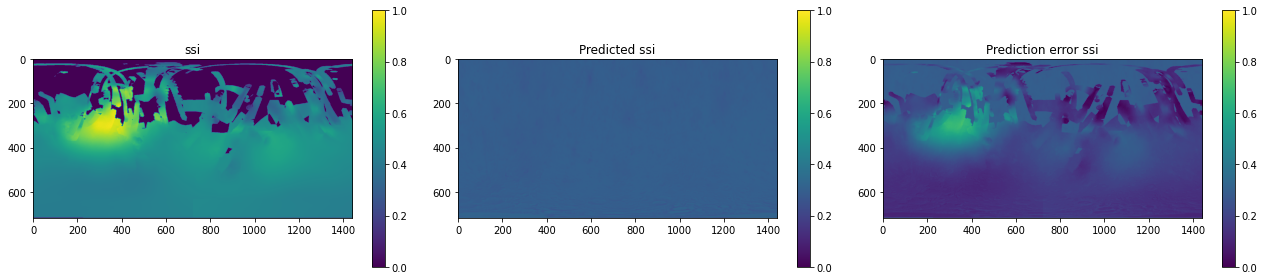

In [8]:
prediction = model.predict(data_all['bottom_half'].reshape(-1,1))
elem = ["alsi","casi", "fesi","mgsi", "ssi"]

for i, name in enumerate(elem):
    img = data_all[name]
    predicted_img = prediction[:,i].reshape(720,-1)
    prediction_error = np.abs(predicted_img - img)
    plt.figure(i)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
    axes[0].set_title(f"{name}")
    im = axes[0].imshow(img, vmin=0, vmax=1)
    plt.colorbar(im, ax=axes[0])
    axes[1].set_title(f"Predicted {name}")
    im = axes[1].imshow(predicted_img, vmin=0, vmax=1)
    plt.colorbar(im, ax=axes[1])
    axes[2].set_title(f"Prediction error {name}")
    im = axes[2].imshow(prediction_error, vmin=0, vmax=1)
    plt.colorbar(im, ax=axes[2])
    fig.tight_layout()